In [3]:
#loading packages for visualizations
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from plotnine import *

# Note:
File pathways in the following code chunks are set to my personal working directory and will need to be changed if code is to be rerun. All data files can be found in the Data folder of my GitHub repo.

# Figure 1

In [1]:
enroll_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/cms_enrollment_dta.csv")
enroll_dta=enroll_dta[enroll_dta['final_report'] == "Y"]
enroll_dta=enroll_dta[['state_name', "report_date", "state_expanded_medicaid", "total_medicaid_enrollment"]]
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('N',"Didn't expand")
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('Y','Expanded')
enroll_dta.rename(columns={"state_name":"State", "state_expanded_medicaid": "Medicaid Expansion Status", "total_medicaid_enrollment":"Total Medicaid Enrollment"}, inplace=True)  #renaming the columns
may2021=enroll_dta[enroll_dta.report_date=="2020-02-01"]
may2021=may2021.reset_index()
may2021=may2021[["State", "Total Medicaid Enrollment","Medicaid Expansion Status"]]

p=(ggplot(may2021,aes(x='State', y="Total Medicaid Enrollment", fill="Medicaid Expansion Status")) +
  geom_col() + 
theme(figure_size=(20, 10)) + 
theme(axis_text_x=element_text(rotation=45, hjust=1, size=20)) +
theme(axis_text_y=element_text(size=22)) +
theme(axis_title=element_text(size=22)) +
theme(legend_text=element_text(size=18), legend_title=element_text(size=18)) +
ggtitle("Figure 1. Total Medicaid Enrollment by State (February 2020)")+
theme(plot_title = element_text(size = 24, face = "bold")))
ggsave(p,"Medicaid Enrollment February 2020.png", dpi=300)

/Users/carolineadams/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 20 x 10 in image.
/Users/carolineadams/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Medicaid Enrollment February 2020.png


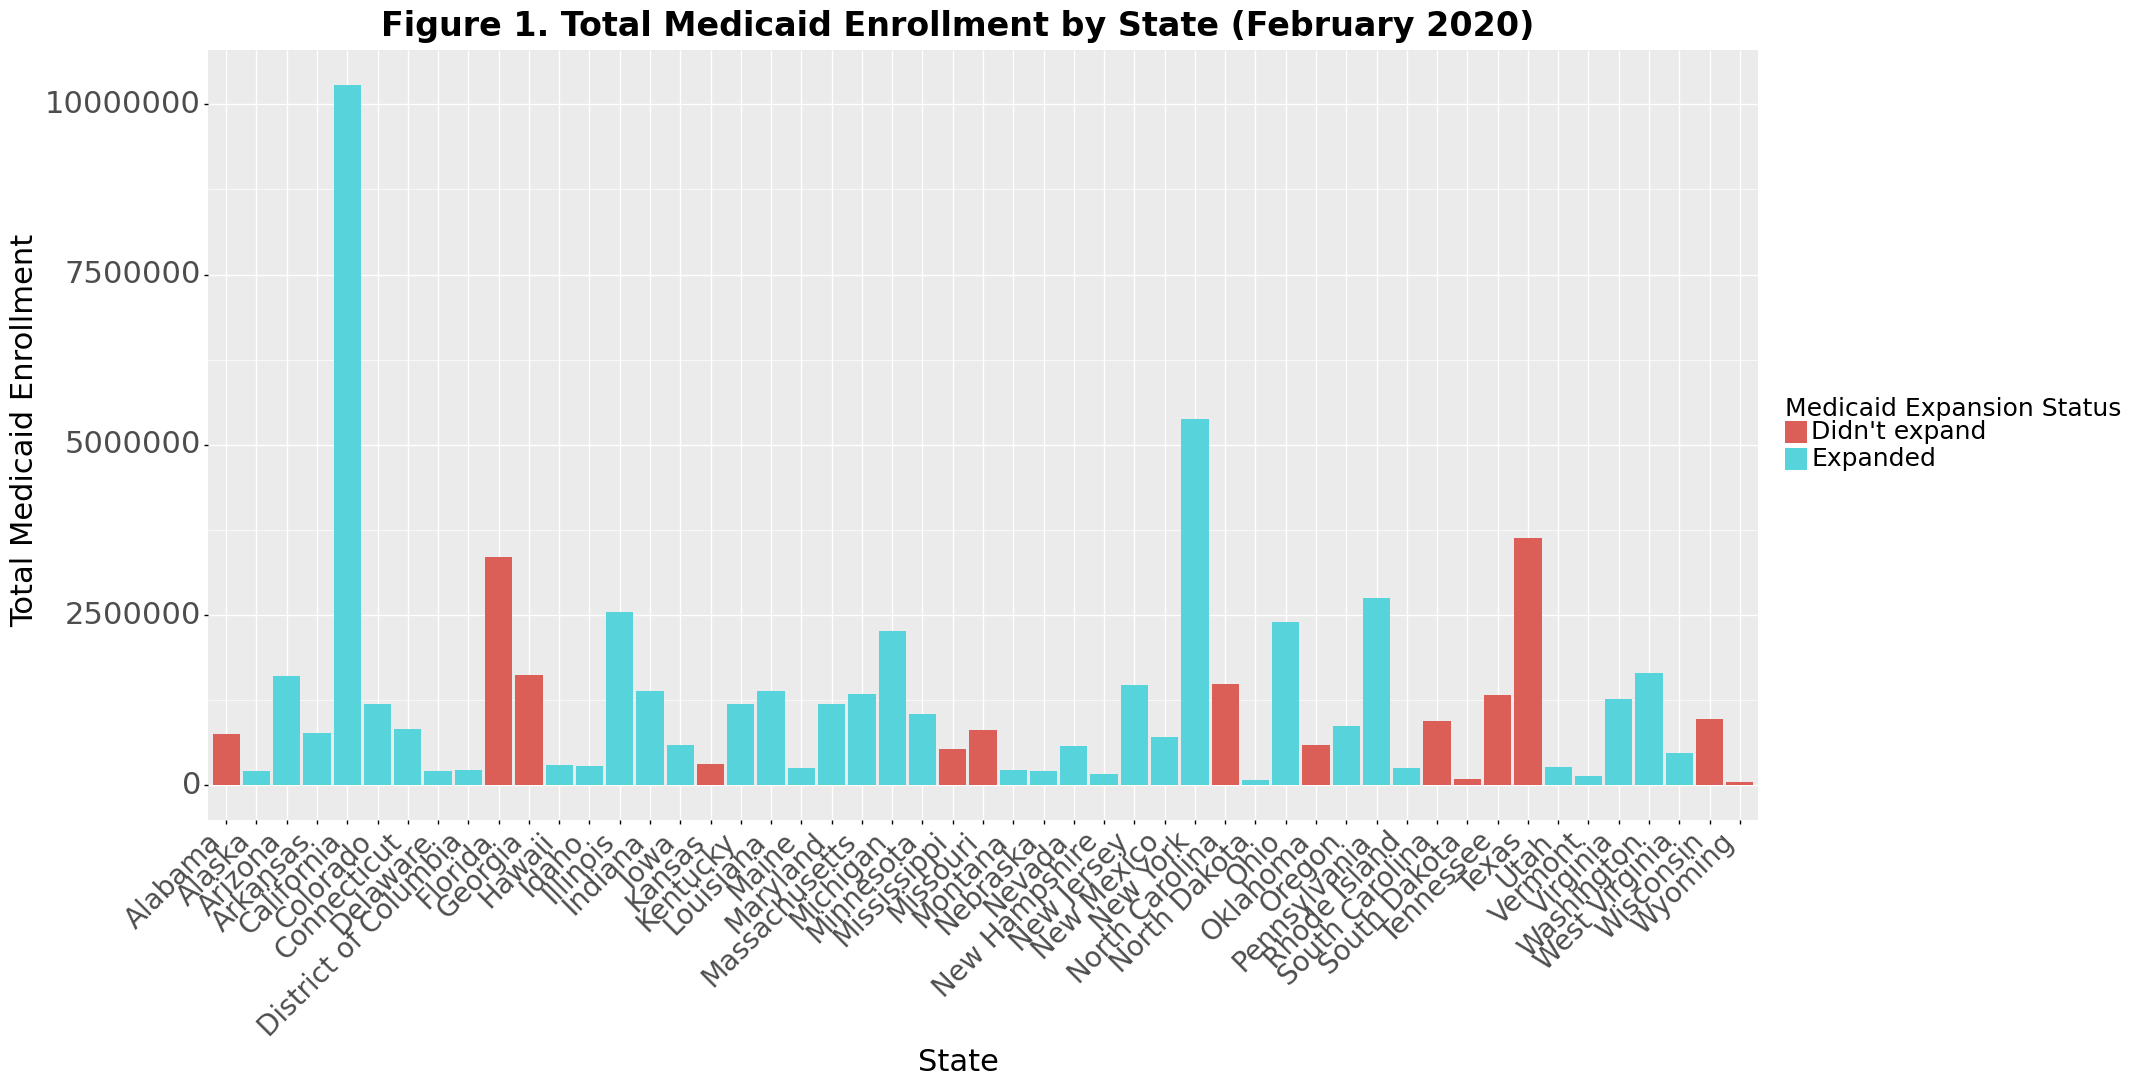

<ggplot: (8787084347624)>

In [2]:
p

# Figure 2

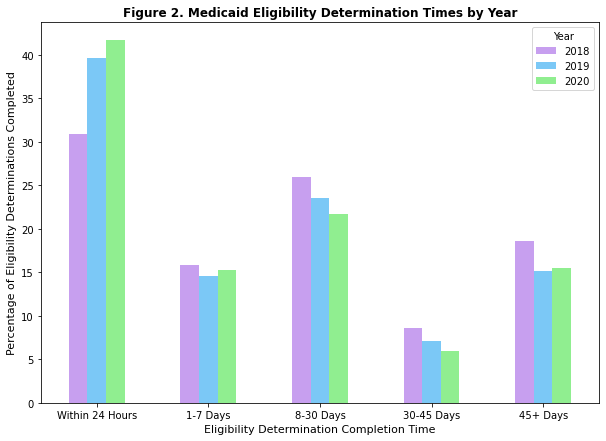

In [4]:
elig_det_dta_18=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_data2018.csv")

elig_det_dta_18.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
elig_det_dta_18['Year']=2018

elig_det_dta_19=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_dta2019.csv")
elig_det_dta_19.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
elig_det_dta_19['Percent of Determinations Processed within 24 Hours']=elig_det_dta_19['Percent of Determinations Processed within 24 Hours']*100
elig_det_dta_19['Percent of Determinations Processed Between 1 and 7 Days']=elig_det_dta_19['Percent of Determinations Processed Between 1 and 7 Days']*100
elig_det_dta_19['Percent of Determinations Processed Between 8 and 30 Days']=elig_det_dta_19['Percent of Determinations Processed Between 8 and 30 Days']*100
elig_det_dta_19['Percent of Determinations Processed Between 31 and 45 Days']=elig_det_dta_19['Percent of Determinations Processed Between 31 and 45 Days']*100
elig_det_dta_19['Percent of Determinations Processed After 45 Days']=elig_det_dta_19['Percent of Determinations Processed After 45 Days']*100
elig_det_dta_19['Year']=2019

elig_det_dta_20=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/state_app_time_data2020.csv")

elig_det_dta_20.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
elig_det_dta_20['Year']=2020

nat_total_18=elig_det_dta_18[elig_det_dta_18.State== "National Total"]
nat_total_19=elig_det_dta_19[elig_det_dta_19.State== "National Total"]
nat_total_20=elig_det_dta_20[elig_det_dta_20.State== "National Total"]
nat_means=nat_total_18.append(nat_total_19)
nat_means=nat_means.append(nat_total_20)
nat_means=nat_means.groupby("Year")
nat_means=nat_means.mean()
nat_means=nat_means.reset_index()
nat_means=nat_means.set_index("Year")
nat_means=nat_means.transpose()
nat_means.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C79FEF', "#7BC8F6", "#90EE90"])  #creating a stacked bar chart based on queried data
plt.title("Figure 2. Medicaid Eligibility Determination Times by Year", fontsize=12, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=11)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=11)  #adding an x axis label
ticks=np.arange(len(nat_means))
plt.yticks(fontsize=10)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
#plt.legend(fontsize=10)
#plt.annotate("Source: Centers for Medicare and Medicaid Services", (0,0), (-80,-20), fontsize=20, 
             #xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

# Figure 3

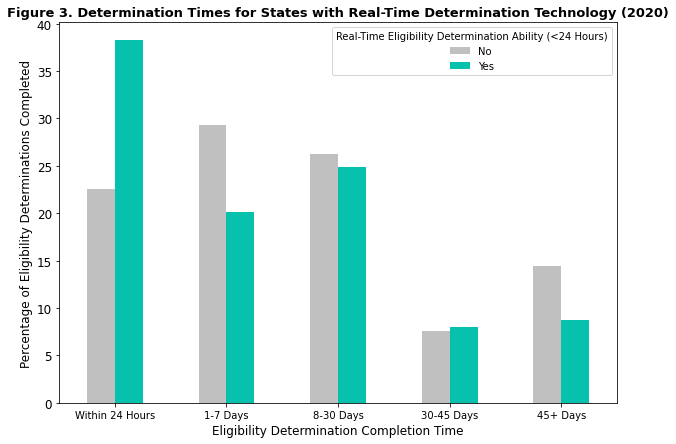

In [5]:
enroll_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/cms_enrollment_dta.csv")
enroll_dta=enroll_dta[enroll_dta['final_report'] == "Y"]
enroll_dta=enroll_dta[['state_name', "report_date", "state_expanded_medicaid", "total_medicaid_enrollment"]]
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('N','Did not expand')
enroll_dta['state_expanded_medicaid'] = enroll_dta['state_expanded_medicaid'].str.replace('Y','Expanded')
enroll_dta.rename(columns={"state_name":"State", "state_expanded_medicaid": "Medicaid Expansion Status", "total_medicaid_enrollment":"Total Medicaid Enrollment"}, inplace=True)  #renaming the columns
may2021=enroll_dta[enroll_dta.report_date=="2021-05-01"]
may2021=may2021.reset_index()
may2021=may2021[["State", "Total Medicaid Enrollment","Medicaid Expansion Status"]]
may2021

elig_det_dta_20=elig_det_dta_20.drop(columns=['Year'])
grouped_20 = elig_det_dta_20.groupby("State")
means_20 = grouped_20.mean()
means_20

grouped_20 = elig_det_dta_20.groupby("State")
means_20 = grouped_20.mean()

means_20 = means_20.reset_index()
means_20.rename(columns={"Percent of Determinations Processed\n< 24 hours":"Percent of Determinations Processed within 24 Hours", "Percent of Determinations Processed\n1 - 7 Days":"Percent of Determinations Processed Between 1 and 7 Days", "Percent of Determinations Processed\n8 - 30 Days":"Percent of Determinations Processed Between 8 and 30 Days", "Percent of Determinations Processed\n31- 45 Days":"Percent of Determinations Processed Between 31 and 45 Days", "Percent of Determinations Processed\n45+ Days":"Percent of Determinations Processed After 45 Days"}, inplace=True)  #renaming the columns
means_20_exp=means_20.merge(may2021, how="outer", on="State")

elig_dta=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/rted_dta_kff.csv")
elig_dta=elig_dta[['Location', "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)"]]
elig_dta=elig_dta.drop([0])
elig_dta=elig_dta.replace({"Not reported": np.nan})
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('Yes','1')
elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'].str.replace('No','0')

elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'] = pd.to_numeric(elig_dta['State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)'], downcast="float")
elig_dta.rename(columns={"Location":"State", "State is Able to Make Real-Time Medicaid Eligibility Determinations (<24 Hours)":"Real-Time Eligibility Determination Ability (<24 Hours)"}, inplace=True)  #renaming the columns

means_20_rted=means_20.merge(elig_dta, how="outer", on="State")
means_20_rted["Real-Time Eligibility Determination Ability (<24 Hours)"] = np.where(means_20_rted["Real-Time Eligibility Determination Ability (<24 Hours)"]== 1, "Yes", "No")
grouped_20_rted = means_20_rted.groupby("Real-Time Eligibility Determination Ability (<24 Hours)")

grouped_20_rted = grouped_20_rted.mean()
grouped_20_rted=grouped_20_rted.transpose()

grouped_20_rted.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C0C0C0', "#06C2AC"])  #creating a stacked bar chart based on queried data
plt.title("Figure 3. Determination Times for States with Real-Time Determination Technology (2020)", fontsize=13, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_20_rted))
plt.yticks(fontsize=12)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
plt.show()

# Figure 4

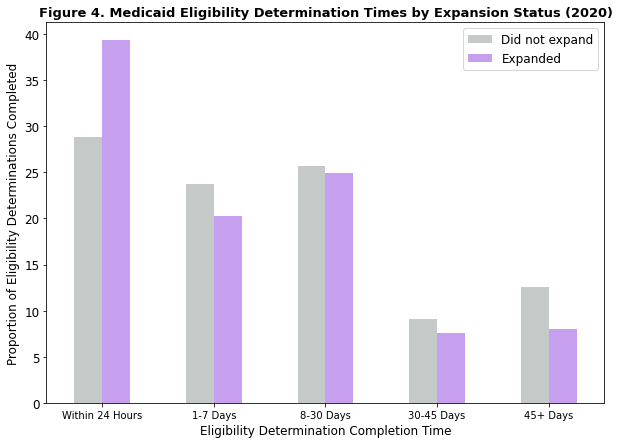

In [6]:
grouped_20_exp = means_20_exp.groupby("Medicaid Expansion Status")
grouped_20_exp = grouped_20_exp.mean()
grouped_20_exp = grouped_20_exp.drop(columns="Total Medicaid Enrollment")
grouped_20_exp=grouped_20_exp.transpose()

grouped_20_exp.plot(kind="bar", stacked=False, figsize=(10,7), color=['#C5C9C7', "#C79FEF"])  #creating a stacked bar chart based on queried data
plt.title("Figure 4. Medicaid Eligibility Determination Times by Expansion Status (2020)", fontsize=13, fontweight="bold")  #adding a plot title
plt.ylabel("Proportion of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_20_exp))
plt.yticks(fontsize=12)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
plt.legend(fontsize=12)
plt.show()

# Figure 5

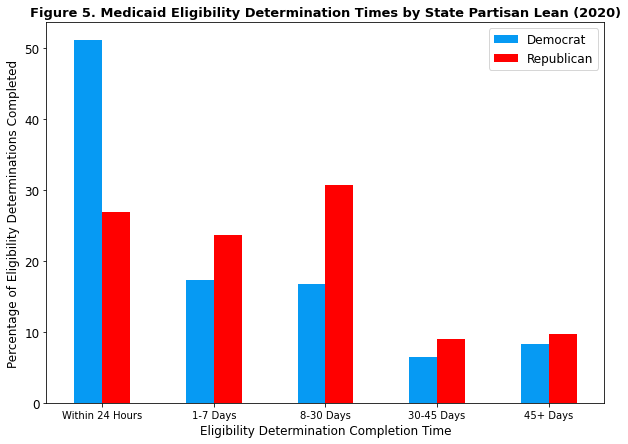

In [7]:
pol_lean=pd.read_csv("/Users/carolineadams/Documents/Georgetown/F21/DS1/FinalProject/PPOL564_Final_Project/Data/pol_lean.csv")
means_20_partisan=means_20.merge(pol_lean, how="outer", on="State")

grouped_20_partisan = means_20_partisan.groupby("Party of Partisan Lean")
grouped_20_partisan = grouped_20_partisan.mean()
grouped_20_partisan = grouped_20_partisan.drop(columns=["Unnamed: 0", "Partisan Lean"])
#grouped_20_partisan=grouped_20_partisan*100
grouped_20_partisan

grouped_20_partisan=grouped_20_partisan.transpose()

grouped_20_partisan.plot(kind="bar", stacked=False, figsize=(10,7), color=['#069AF3', "#FF0000"])  #creating a stacked bar chart based on queried data
plt.title("Figure 5. Medicaid Eligibility Determination Times by State Partisan Lean (2020)", fontsize=13, fontweight="bold")  #adding a plot title
plt.ylabel("Percentage of Eligibility Determinations Completed", fontsize=12)  #adding a y axis label
plt.xlabel("Eligibility Determination Completion Time", fontsize=12)  #adding an x axis label
ticks=np.arange(len(grouped_20_partisan))
plt.yticks(fontsize=12)
plt.xticks(ticks=ticks, labels=["Within 24 Hours", "1-7 Days", "8-30 Days", "30-45 Days", "45+ Days"], fontsize=10, rotation=0)
plt.legend(fontsize=12)
plt.show()

# Figure 6

See Jupyter notebook file, "Machine Learning" to see full set of code that results in the following visualization.

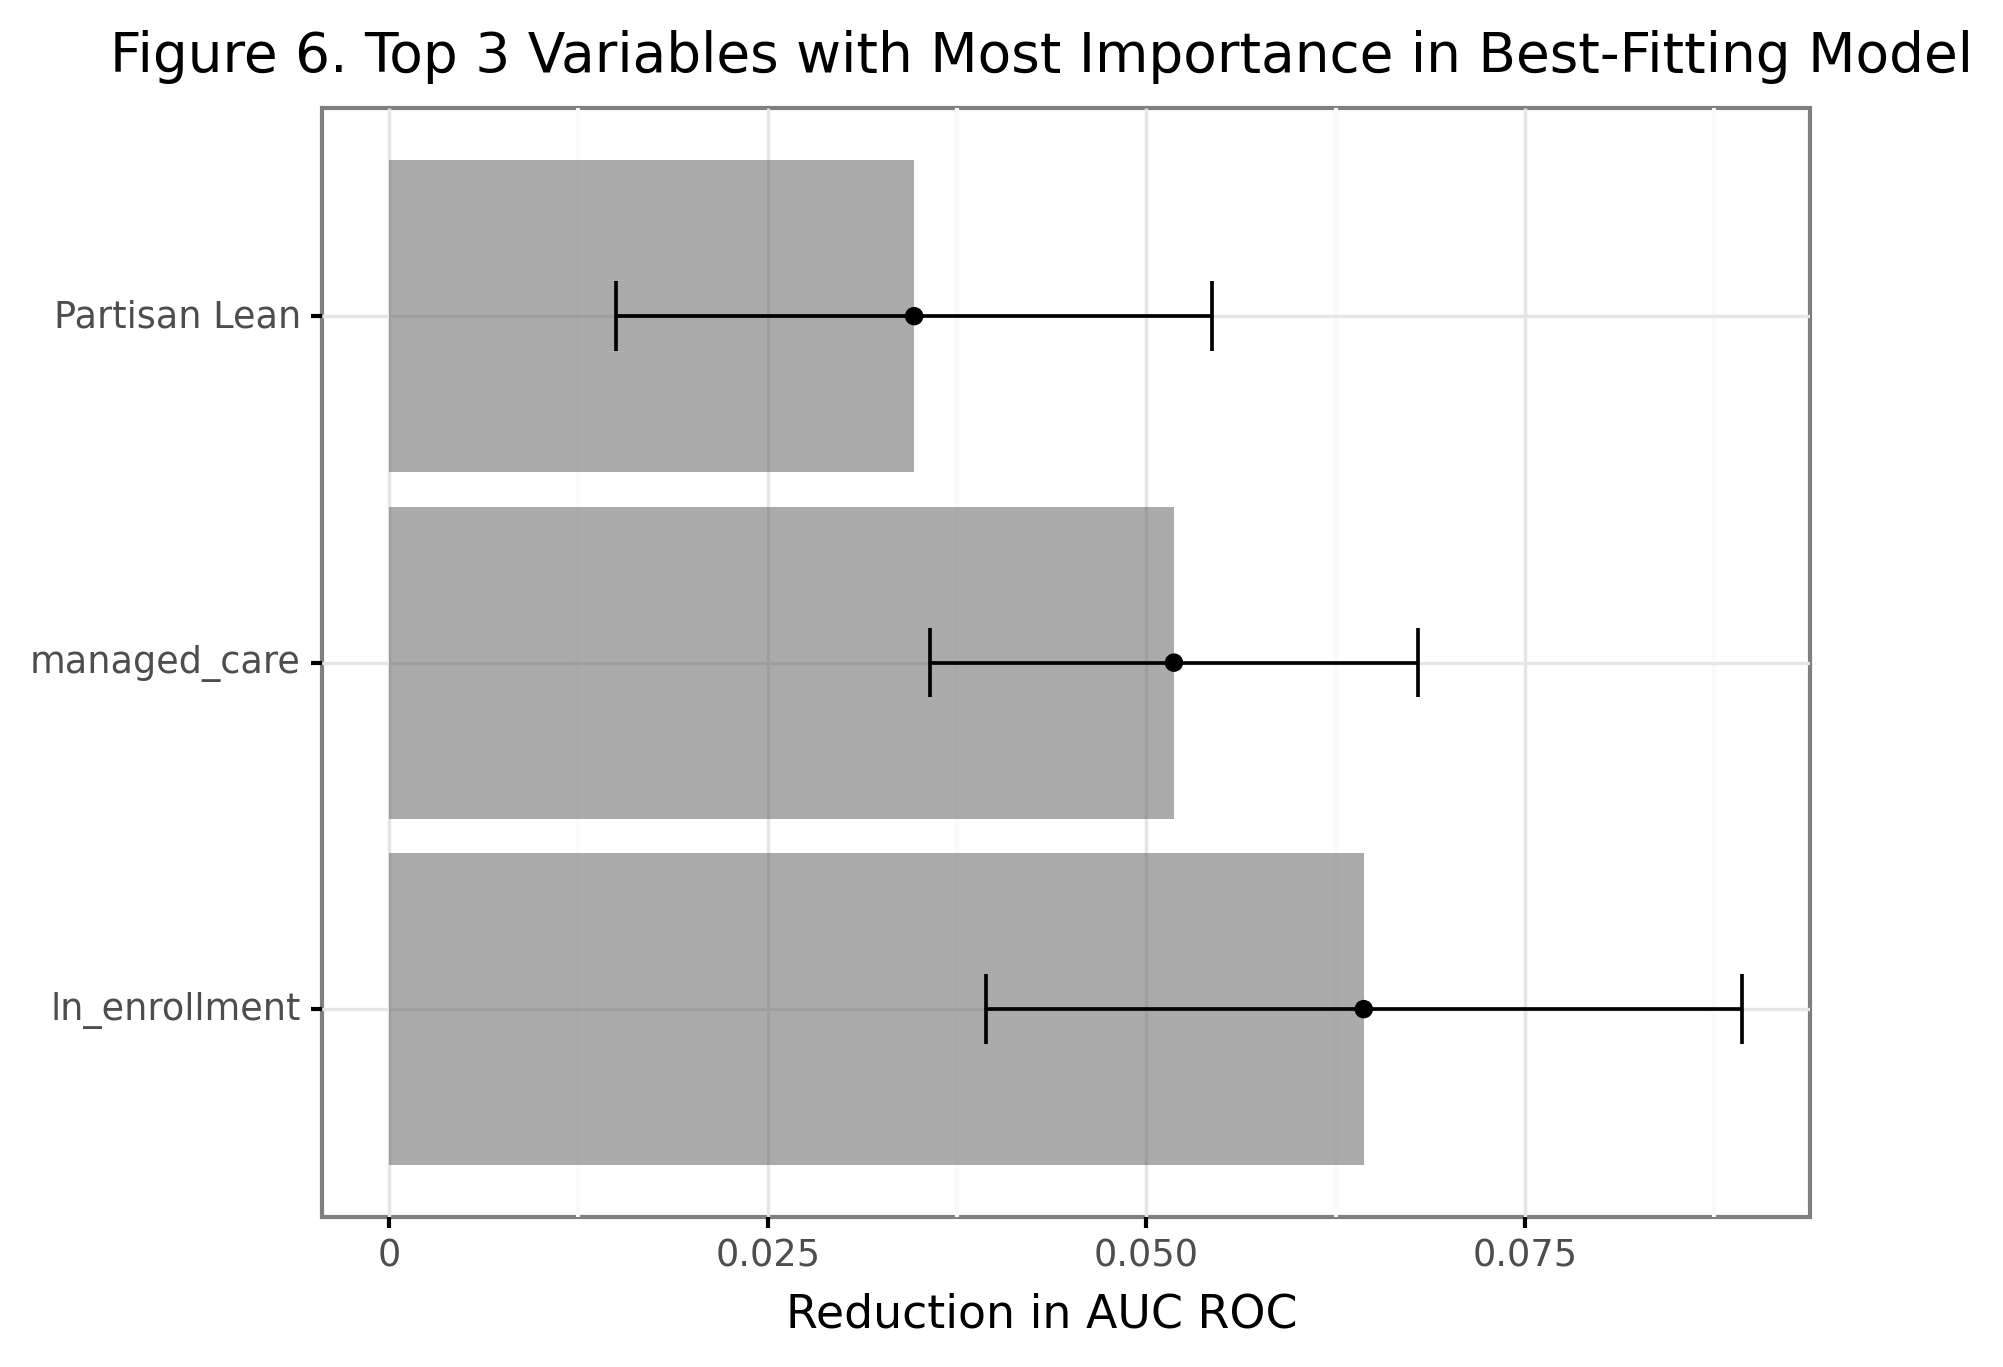